<ipython-input-1-15e1ae3ff2fb>:28: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)


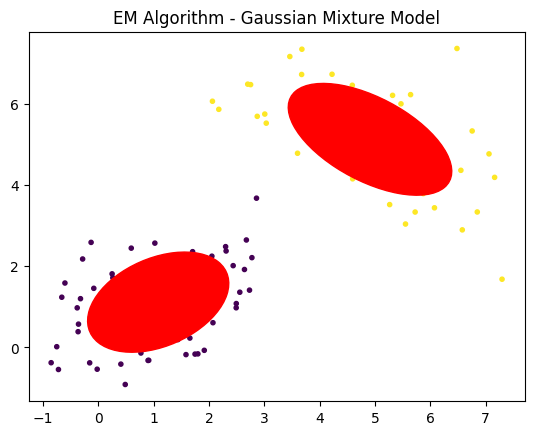

In [1]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def generate_data():
    np.random.seed(42)
    mean1 = [1, 1]
    cov1 = [[1, 0.5], [0.5, 1]]

    mean2 = [5, 5]
    cov2 = [[1, -0.5], [-0.5, 1]]

    data1 = np.random.multivariate_normal(mean1, cov1, 100)
    data2 = np.random.multivariate_normal(mean2, cov2, 100)

    data = np.vstack([data1, data2])
    np.random.shuffle(data)

    return data

def plot_ellipse(ax, mean, cov, color):
    v, w = np.linalg.eigh(cov)
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180.0 * angle / np.pi
    ell = Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)
    ax.add_patch(ell)

def em_algorithm(X, n_components, max_iter=100):
    gmm = GaussianMixture(n_components=n_components, max_iter=max_iter)
    gmm.fit(X)

    plt.scatter(X[:, 0], X[:, 1], c=gmm.predict(X), cmap='viridis', marker='.')

    for i in range(n_components):
        plot_ellipse(plt.gca(), gmm.means_[i], gmm.covariances_[i], 'red')

    plt.title('EM Algorithm - Gaussian Mixture Model')
    plt.show()

def main():
    data = generate_data()
    em_algorithm(data, n_components=2)

if __name__ == "__main__":
    main()


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn import metrics

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


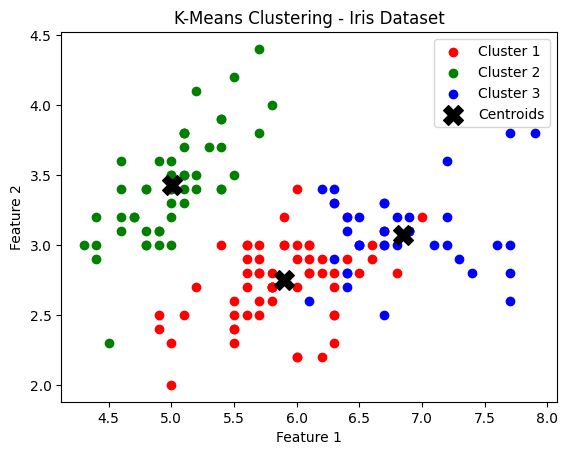

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data

# Choose the number of clusters (K)
k = 3

# Create a K-Means model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize the clusters
colors = ['red', 'green', 'blue']

for i in range(k):
    cluster_points = X[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i + 1}')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='black', label='Centroids')
plt.title('K-Means Clustering - Iris Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [8]:
pip install mlxtend


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# Sample transaction data
transactions = [
    ['bread', 'milk', 'eggs'],
    ['bread', 'butter'],
    ['milk', 'butter'],
    ['bread', 'milk', 'butter'],
    ['bread', 'milk'],
]

# Convert the transaction data into a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

# Generate association rules from frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Display the frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)

Frequent Itemsets:
   support         itemsets
0      0.8          (bread)
1      0.6         (butter)
2      0.8           (milk)
3      0.4  (bread, butter)
4      0.6    (milk, bread)
5      0.4   (milk, butter)

Association Rules:
  antecedents consequents  antecedent support  consequent support  support  \
0      (milk)     (bread)                 0.8                 0.8      0.6   
1     (bread)      (milk)                 0.8                 0.8      0.6   

   confidence    lift  leverage  conviction  zhangs_metric  
0        0.75  0.9375     -0.04         0.8          -0.25  
1        0.75  0.9375     -0.04         0.8          -0.25  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


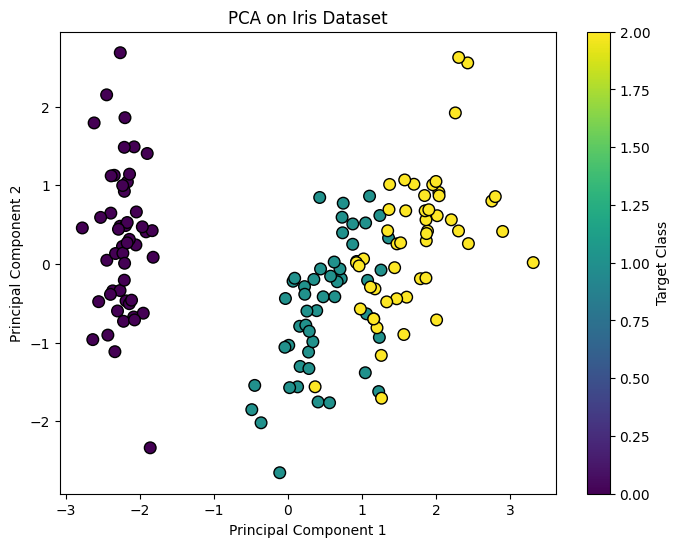

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data (optional but recommended for PCA)
X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Initialize PCA with the desired number of components (in this case, 2)
pca = PCA(n_components=2)

# Fit and transform the data
X_pca = pca.fit_transform(X_standardized)

# Plot the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=70)
plt.colorbar(scatter, label='Target Class')
plt.title('PCA on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()